In [1]:
import pandas as pd

C:\Users\Acer\AppData\Local\Temp\ipykernel_8396\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

# Replace 'your_dataset_path/adult.data' with the actual path to your dataset file
file_path = 'adult/adult.data'

# Load the dataset into a DataFrame using read_csv with appropriate parameters
df = pd.read_csv(file_path, header=None, na_values='?', skipinitialspace=True)

headers=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","Census-Income"]
df.columns = headers

# Display the first few rows of the DataFrame
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Census-Income  
0          2174             0              40  United-States         <=50K  
1             0             

In [3]:
df.shape

(32561, 15)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Census-Income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Census-Income        0
dtype: int64


In [7]:
# Drop rows with NaN values
df_cleaned = df.dropna()

In [8]:
df_cleaned.shape

(30162, 15)

In [13]:
# Check for null values in the DataFrame
null_values = df_cleaned.isnull().sum()

# Display the count of null values for each column
print(null_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Census-Income     0
dtype: int64


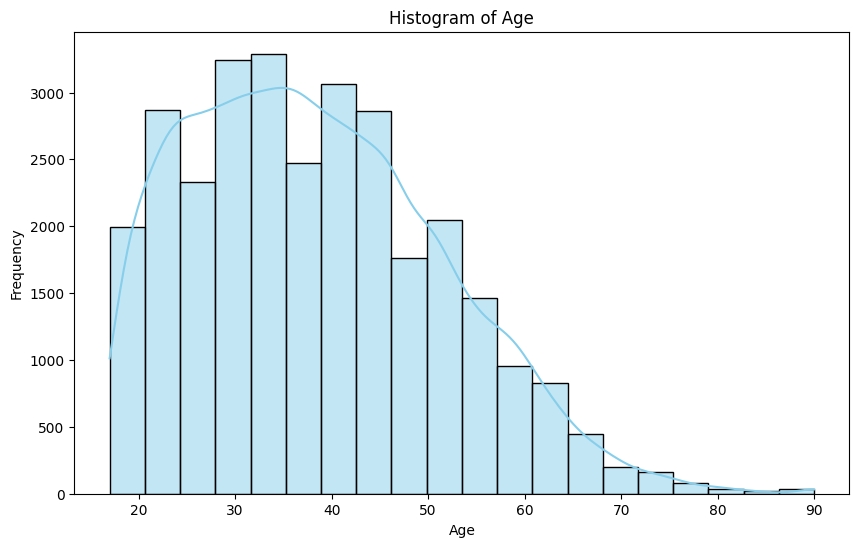

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_12164\3378915006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workclass', data=df_cleaned, palette='viridis')


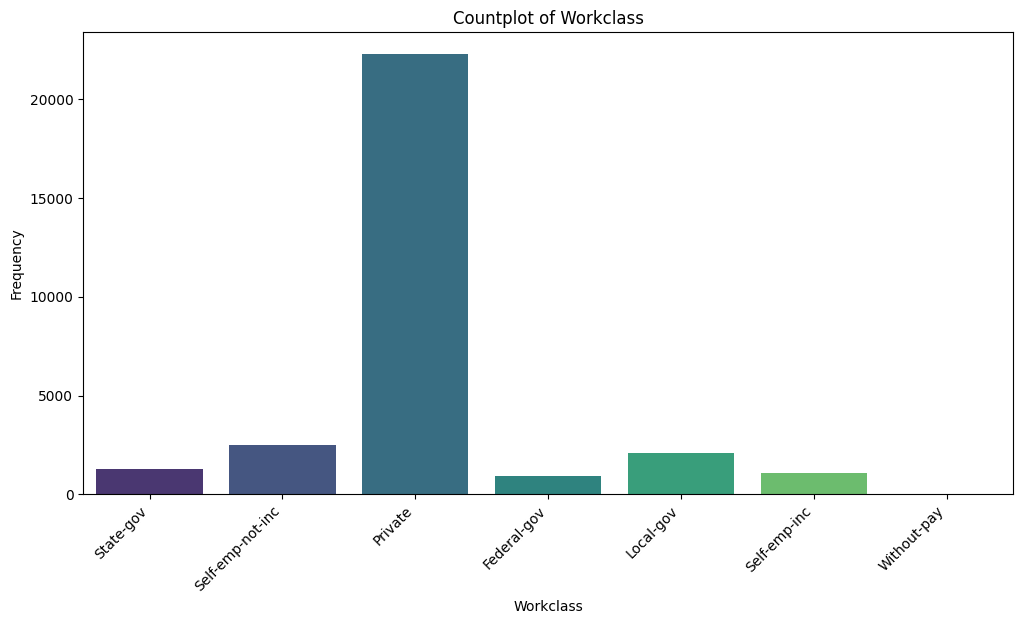

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', data=df_cleaned, palette='viridis')
plt.title('Countplot of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


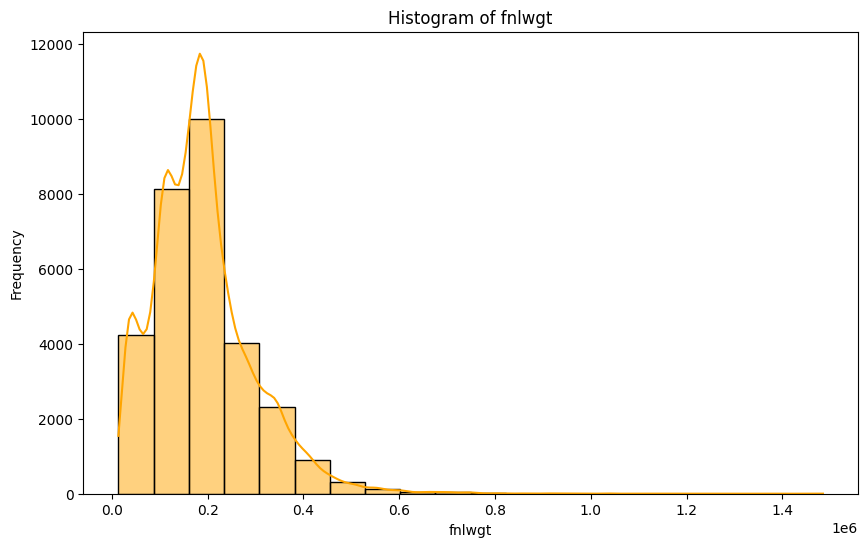

In [14]:
# Assuming df_cleaned is your cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['fnlwgt'], bins=20, kde=True, color='orange')
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12164\551914026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df_cleaned, palette='pastel')


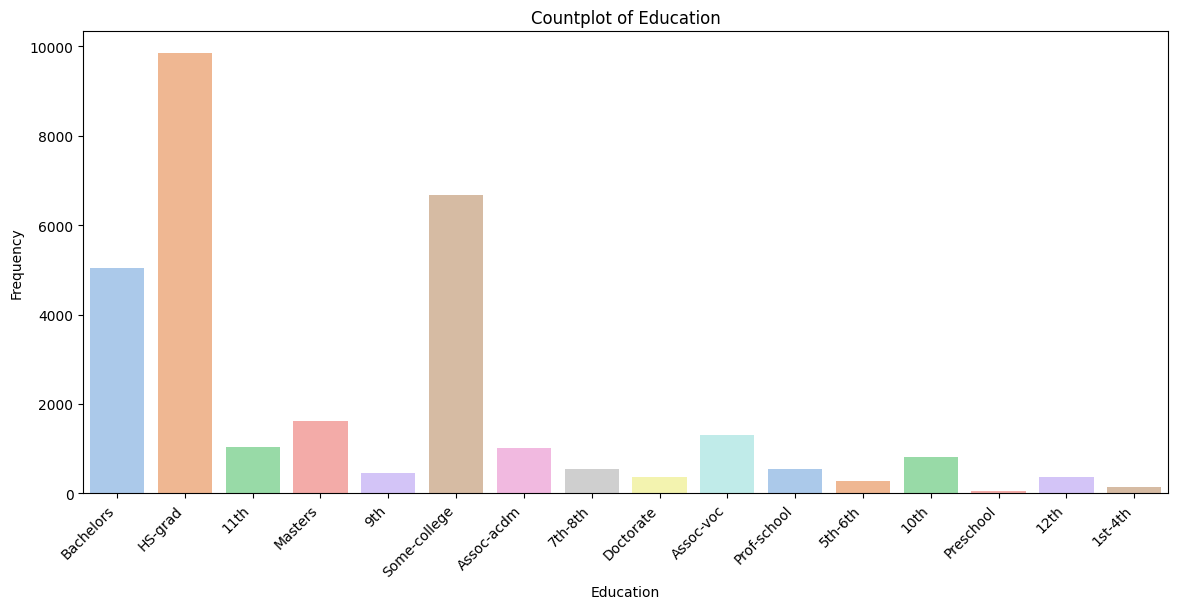

In [15]:
# Assuming df_cleaned is your cleaned DataFrame
plt.figure(figsize=(14, 6))
sns.countplot(x='education', data=df_cleaned, palette='pastel')
plt.title('Countplot of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

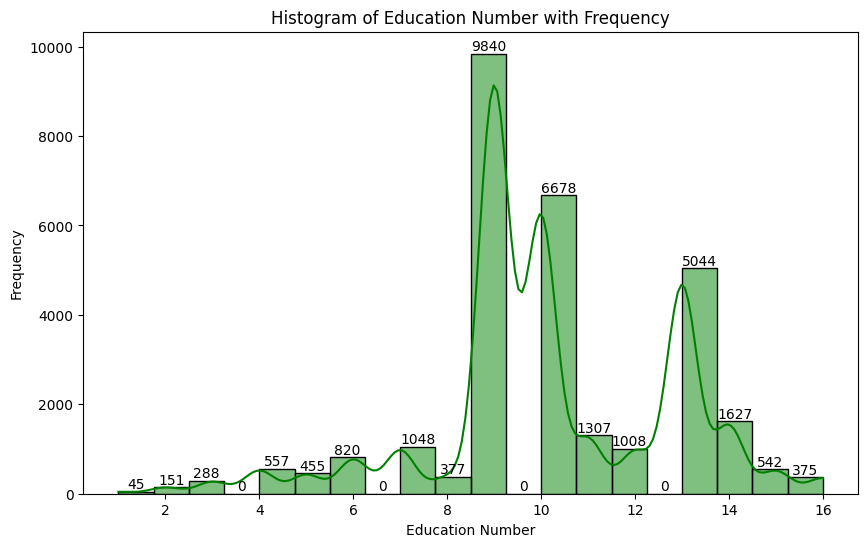

In [19]:
# Assuming df_cleaned is your cleaned DataFrame
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_cleaned['education-num'], bins=20, kde=True, color='green')

# Annotate each bar with its frequency
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Histogram of Education Number with Frequency')
plt.xlabel('Education Number')
plt.ylabel('Frequency')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12164\604898294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='marital-status', data=df_cleaned, palette='muted')


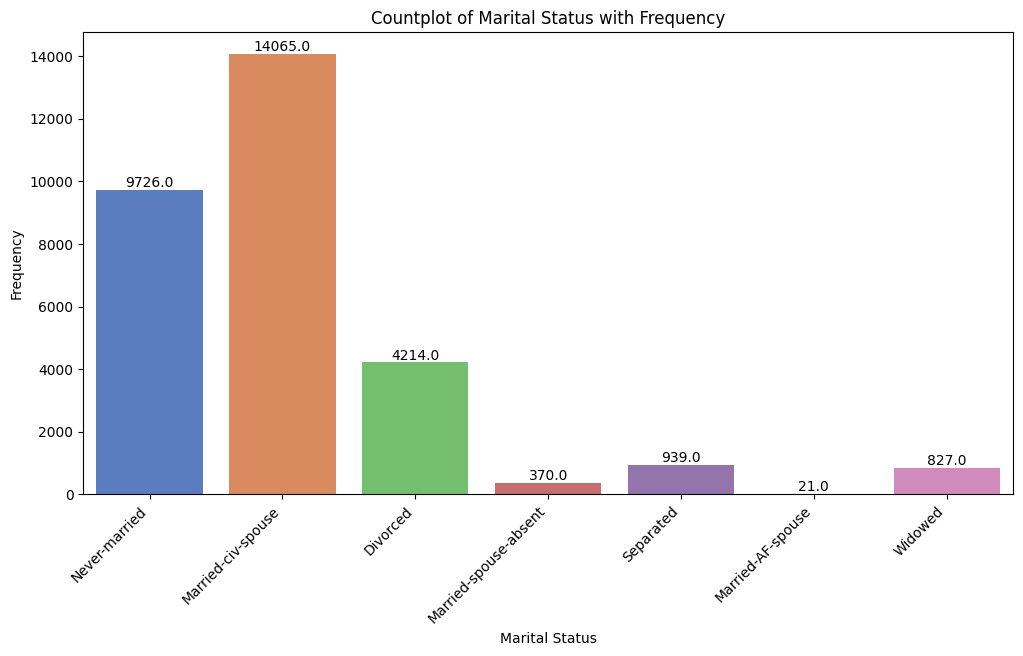

In [18]:
# Assuming df_cleaned is your cleaned DataFrame
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='marital-status', data=df_cleaned, palette='muted')

# Annotate each bar with its frequency directly on top
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Countplot of Marital Status with Frequency')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()